In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('stroke_data.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


# Checking missing values

In [32]:
df.isnull().values.any()

False

# Seperating people with stroke status (0 & 1)

In [33]:
stroke_true = df[df['stroke']==1]
stroke_false = df[df['stroke']==0]

# - As we seperated the stroke status (0 and 1) We found that people who had stroke are relatively old peoples compared to the people who never had stroke, Also people who had stroke generally had high glucose level and body mass index

In [34]:
stroke_true.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.0
mean,67.819839,0.266129,0.189516,132.175565,30.186694,1.0
std,12.670565,0.442826,0.392711,61.771083,5.658245,0.0
min,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,59.000000,0.000000,0.000000,79.572500,26.975000,1.0
50%,71.000000,0.000000,0.000000,105.040000,29.450000,1.0
75%,78.000000,1.000000,0.000000,195.960000,32.650000,1.0
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.0


In [35]:
stroke_false.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.0
mean,42.141348,0.087260,0.048172,104.569056,28.409698,0.0
std,22.345036,0.282245,0.214153,43.602188,6.833637,0.0
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.0
25%,24.000000,0.000000,0.000000,77.120000,23.500000,0.0
50%,43.000000,0.000000,0.000000,91.450000,28.000000,0.0
75%,60.000000,0.000000,0.000000,112.620000,32.600000,0.0
max,82.000000,1.000000,1.000000,267.760000,48.900000,0.0


# Here we can see that people with private jobs are most affected with stroke in comparision with other type of jobs

<AxesSubplot:xlabel='work_type', ylabel='count'>

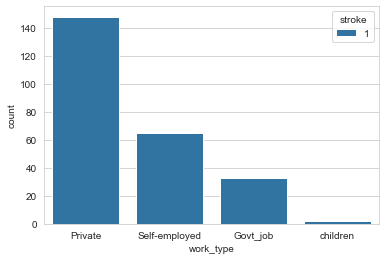

In [27]:
sns.set_style('whitegrid')
sns.countplot(x="work_type", hue="stroke" ,  data=stroke_true)

# People from rural areas are least affected with stroke 

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

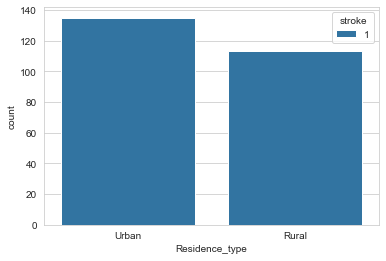

In [28]:
sns.set_style('whitegrid')
sns.countplot(x="Residence_type", hue="stroke" ,  data=stroke_true)

<AxesSubplot:xlabel='hypertension', ylabel='count'>

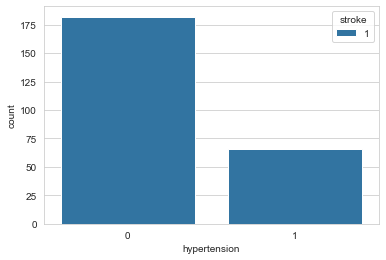

In [37]:
sns.set_style('whitegrid')
sns.countplot(x="hypertension", hue="stroke" ,  data=stroke_true)

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

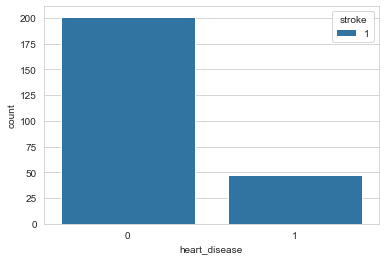

In [38]:
sns.set_style('whitegrid')
sns.countplot(x="heart_disease", hue="stroke" ,  data=stroke_true)

# Susprisingly married people are the one who suffered mostly with stroke

<AxesSubplot:xlabel='ever_married', ylabel='count'>

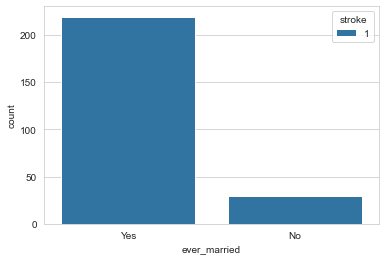

In [39]:
sns.set_style('whitegrid')
sns.countplot(x="ever_married", hue="stroke" ,  data=stroke_true)

# Encoding categorical features using LabelEncoder

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [48]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,1,105.92,32.5,2,1
2,0,49.0,0,0,0,0,0,171.23,34.4,3,1
3,0,79.0,1,0,0,0,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [63]:
x = df.drop('stroke', axis=1)
y = df['stroke']

In [65]:
print(x)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          1   
1          1  80.0             0              1             1          1   
2          0  49.0             0              0             0          0   
3          0  79.0             1              0             0          0   
4          1  81.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4976       1  41.0             0              0             1          1   
4977       1  40.0             0              0             1          1   
4978       0  45.0             1              0             0          0   
4979       1  40.0             0              0             1          1   
4980       0  80.0             1              0             0          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  
0                  1   

# Splitting data into training and testing

In [61]:
from sklearn. model_selection import train_test_split

In [74]:
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Importing logistic regression model

In [80]:
from sklearn.linear_model import LogisticRegression

In [82]:
model = LogisticRegression()

In [84]:
model.fit(X_train,Y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
x_test_prediction = model.predict(X_test)

In [87]:
accuracy = accuracy_score(x_test_prediction,Y_test)

In [88]:
print(accuracy)

0.9458375125376128
